# Diabetes Prediction Using Models: Gradient Boosting, XGBoost, Random Forest, Logistic Regression, Decision Tree

In this notebook, we will build a decision tree model to predict whether a subject has diabetes based on features such as age, blood pressure, and BMI. The dataset we are using is the **Pima Indians dataset**, which contains 768 records and is available in the UCI Machine Learning Repository. The dataset has been divided into training (80%) and testing (20%) sets.

A **decision tree** is a flowchart-like structure where:
- Each internal node represents a feature (or attribute),
- The branches represent decision rules,
- The leaf nodes represent the outcome or prediction.

The decision tree splits data recursively based on feature values, making it easy to interpret and visualize.


Diabetes Prediction Using Decision Tree

We will build a decision tree to predict diabetes for subjects in the Pima Indians dataset based on predictor variables such as age, blood pressure, and bmi.

<center><img src='https://i.imgur.com/6Fam41M.png'></center>

A subset of the **Pima Indians data** from the UCI Machine Learning Repository is a built-in dataset in the MASS library. The Pima data in MASS contains 768 complete records from the original dataset.

These **768 records** have been broken down into two dataframes: Train dataframe has 80% and Test dataframe has 20% of total subjects. All records with zeros that don’t make sense have been cleaned out of these datasets.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It’s visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

# Load Libraries
In this step, we import the necessary libraries:
- **pandas** and **numpy** for data manipulation and handling.
- **DecisionTreeClassifier** from **sklearn.tree** to build the decision tree model.
- **train_test_split** from **sklearn.model_selection** to split the dataset into training and testing sets.
- **metrics** for evaluating the performance of our model.


In [ ]:
# Load libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Load the Dataset
We load the diabetes dataset using pandas. The dataset is assumed to be stored as a CSV file named "diabetes.csv".


In [ ]:
data = pd.read_csv(r"diabetes.csv")

# Displaying the First Few Rows of the Dataset
We use the `head()` function to display the first few rows of the dataset. This allows us to quickly examine the data and check if it has loaded correctly.


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking the Shape of the Dataset
Here, we check the shape of the dataset to know how many rows and columns it contains. This helps us understand the size of the data we're working with.


In [ ]:
data.shape

(768, 9)

# Assigning Column Names
We define a list of column names for the dataset and assign them to the dataframe. This improves readability and makes it easier to work with the data.


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Display the First Few Rows Again After Renaming Columns
We use the `head()` function again to display the first few rows after renaming the columns to ensure that the changes were applied correctly.


In [ ]:
data.columns = col_names

In [ ]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Split Dataset into Features and Target Variable
We separate the dataset into two parts:
- **X**: The features (input variables like glucose, age, etc.)
- **y**: The target variable (label column indicating whether the person has diabetes).


In [ ]:
#split dataset in features and target variable

X = data.drop(columns = 'label') # Features
y = data['label'] # Target variable

# Split Dataset into Training Set and Test Set
Here, we split the data into training and testing sets using `train_test_split`. 80% of the data is used for training, and 20% is used for testing. The random_state ensures that the split is reproducible.


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check the Shape of the Training Set
We use the `shape` function to check the dimensions of the training set `X_train`. This helps us confirm that the dataset was split correctly.


In [ ]:
X_train.shape

(614, 8)

# Check for Missing Values in the Training Set
We check for missing values in the training dataset using the `isna().sum()` function. This is important because missing values can negatively affect the performance of the model.


In [ ]:
X_train.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
dtype: int64

# Check the Shape of the Test Set
We check the shape of the test dataset `X_test` to confirm that it has the expected number of samples after the split.


In [ ]:
X_test.shape

(154, 8)

# Create Decision Tree Classifier Object
We create a **DecisionTreeClassifier** object called `clf`. This object will be used to build the decision tree model.


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train the Decision Tree Classifier
Here, we train the decision tree classifier (`clf`) using the training data (`X_train` and `y_train`). This step builds the decision tree based on the training data.


In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the Response for the Test Dataset
After training the model, we use the `predict()` function to predict the labels for the test dataset (`X_test`). The predicted values are stored in `y_pred`.


In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the Model on the Training Set
We use the `score()` function to evaluate the performance of the decision tree classifier on the training data. This function calculates the accuracy (the proportion of correct predictions).


In [ ]:
clf.score(X_train,y_train)

1.0

# Evaluate the Model on the Test Set
We use the `score()` function again to evaluate the model’s performance on the test dataset. This helps us understand how well the model generalizes to unseen data.


In [ ]:
clf.score(X_test,y_test)

0.7077922077922078

# Model Accuracy
We use the `accuracy_score()` function from `metrics` to calculate how often the model's predictions are correct on the test set.


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7077922077922078


# Classification Report
Finally, we use the `classification_report()` function from `metrics` to generate a detailed report on the model's performance, including precision, recall, and F1 score for each class.


In [ ]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       104
           1       0.55      0.60      0.57        50

    accuracy                           0.71       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.72      0.71      0.71       154



# Print the Decision Tree
This code prints the structure of the trained decision tree model. It shows the parameters used by the decision tree classifier after training.


In [ ]:
print(clf)

DecisionTreeClassifier()


# Visualize the Decision Tree
Here, we visualize the decision tree using `plot_tree` from sklearn. This visualization shows how the decision tree splits the data based on features, and it helps to understand the decision-making process of the model.


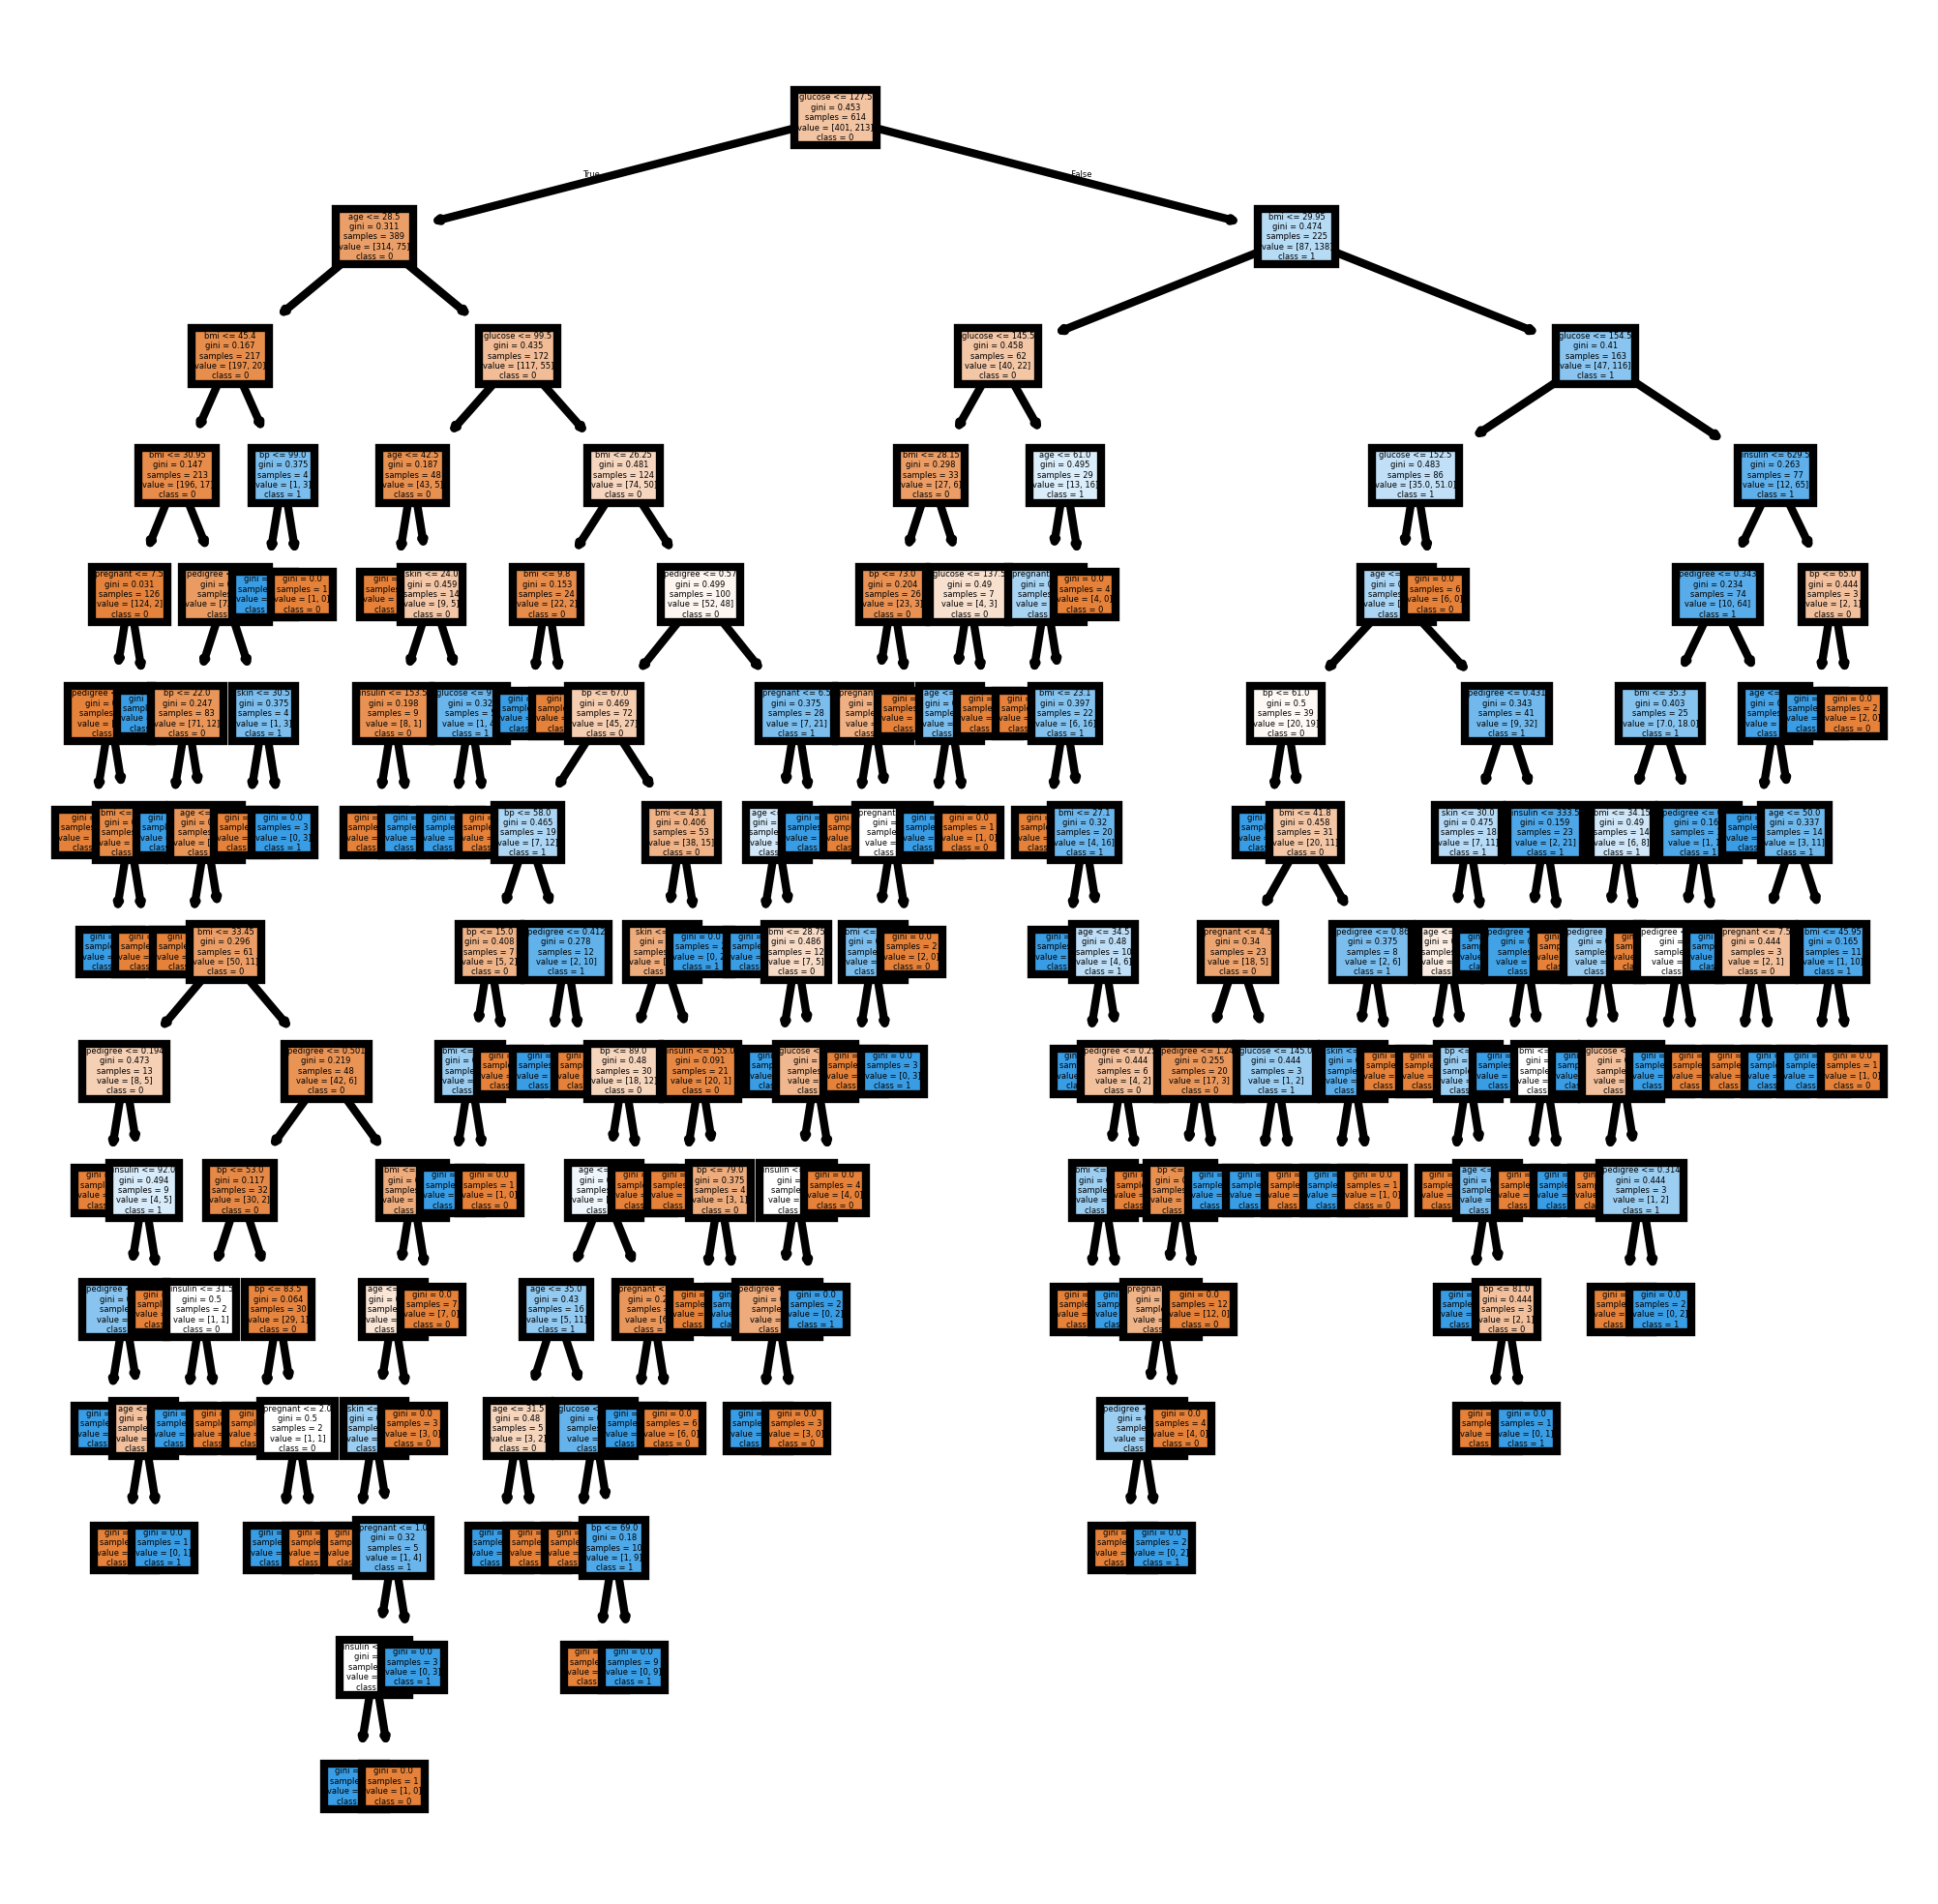

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = col_names,
               class_names=['0','1'],
               filled = True);

fig.savefig('imagename.png')

# Tree Optimization

In [ ]:
parameterstree = DecisionTreeClassifier(criterion = "entropy",
                                        splitter = "random",
                                        max_depth = 2,
                                        min_samples_split = 5,
                                        min_samples_leaf = 5,
                                        max_features = 5,
                                       random_state=206)

# Training the Model

1. **parameterstree**:
   - This is the **DecisionTreeClassifier** model (or any other model) that has been initialized earlier. It could be any classifier or regressor (e.g., `RandomForestClassifier`, `LogisticRegression`, etc.) that has been set up with specific parameters.
   
2. **fit(X_train, y_train)**:
   - The `fit()` method is used to train the model using the **training data** (`X_train`) and the corresponding **target labels** (`y_train`).
   - During this process, the model learns from the data and adjusts its internal parameters to minimize errors or maximize performance according to the chosen objective (e.g., classification accuracy, mean squared error, etc.).
   - In the case of a decision tree, the model will create splits in the data based on the feature values to form a tree structure that best separates the classes in the target variable.



In [ ]:
parameterstree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=5,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=206, splitter='random')

# Making Predictions with the Trained Model

1. **parameterstree**:
   - This is the **DecisionTreeClassifier** (or any other trained model) that was previously trained using the `fit()` method on the training data (`X_train` and `y_train`).

2. **predict(X_test)**:
   - The `predict()` method is used to make predictions based on the input data (`X_test`), which contains the features of the test set.
   - The trained model applies the learned patterns to the test data (`X_test`) and generates predictions for each instance in the test set. These predictions are based on the decision rules (or learned relationships) from the training process.

3. **y_pred_param**:
   - The result of the `predict()` method is stored in `y_pred_param`. This variable holds the predicted labels for each instance in the test set (`X_test`), which can then be compared to the actual labels (`y_test`) to evaluate model performance.



In [ ]:
y_pred_param = parameterstree.predict(X_test)

# Evaluating the Model's Performance on the Training Set

1. **parameterstree**:
   - This is the **DecisionTreeClassifier** (or any other trained model) that was previously trained using the `fit()` method on the training data (`X_train` and `y_train`).

2. **score(X_train, y_train)**:
   - The `score()` method is used to evaluate the performance of the model on the **training data** (`X_train` and `y_train`).
   - It calculates the **accuracy** of the model by comparing the predicted labels for the training data with the actual labels (`y_train`).
   - The accuracy is defined as the ratio of correct predictions to the total number of predictions. A higher score indicates better performance on the training set.




In [ ]:
parameterstree.score(X_train,y_train)

0.739413680781759

# Evaluating the Model's Performance on the Test Set

1. **parameterstree**:
   - This is the **DecisionTreeClassifier** (or any other trained model) that was previously trained using the `fit()` method on the training data (`X_train` and `y_train`).

2. **score(X_test, y_test)**:
   - The `score()` method calculates the **accuracy** of the model by comparing the predicted labels for the test data (`X_test`) with the true labels (`y_test`).
   - Accuracy is defined as the proportion of correct predictions made by the model. The higher the accuracy, the better the model performs in terms of classifying the test data correctly.

3. **X_test**:
   - `X_test` is the **feature data** for the test set, containing input variables that the model has not seen before during training. It is used to evaluate how well the model generalizes to new, unseen data.

4. **y_test**:
   - `y_test` is the **true target labels** for the test set, representing the actual classes or values that correspond to each instance in `X_test`.



In [ ]:
parameterstree.score(X_test,y_test)

0.7207792207792207

# Accuracy Calculation

1. **metrics.accuracy_score(y_test, y_pred_param)**:
   - The `accuracy_score()` function from the `metrics` module computes the **accuracy** of the model by comparing the true labels (`y_test`) with the predicted labels (`y_pred_param`).
   - Accuracy is defined as the proportion of correct predictions to the total number of predictions.

2. **y_test**:
   - `y_test` represents the **true target labels** for the test set. These are the actual class values or target labels that correspond to each instance in the test set.

3. **y_pred_param**:
   - `y_pred_param` contains the **predicted labels** generated by the trained model for the test data (`X_test`). These predictions are compared to `y_test` to calculate accuracy.

4. **print()**:
   - The `print()` function is used to display the calculated accuracy score. It shows how well the model's predictions match the true labels in the test set.



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.7207792207792207


# Classification Report

1. **metrics.classification_report(y_pred_param, y_test)**:
   - The `classification_report()` function from the `metrics` module generates a detailed report on the performance of the classification model.
   - It compares the predicted labels (`y_pred_param`) with the true labels (`y_test`) to compute several important metrics for classification tasks.

2. **What the report includes**:
   - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
   - **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
   - **F1-Score**: The weighted average of precision and recall. It is a good measure when the class distribution is imbalanced.
   - **Support**: The number of actual occurrences of each class in the dataset.

3. **y_pred_param**:
   - `y_pred_param` contains the **predicted labels** generated by the trained model for the test data (`X_test`).

4. **y_test**:
   - `y_test` represents the **true target labels** for the test set, which are the actual class values for each instance.

5. **print()**:
   - The `print()` function outputs the classification report, providing a summary of the model's performance across multiple metrics.

In [ ]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       112
           1       0.49      0.64      0.56        42

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.75      0.72      0.73       154



# Visualizing the Decision Tree

This code visualizes the decision tree (`parameterstree`) using **matplotlib** and **sklearn's tree.plot_tree**.

1. **import matplotlib.pyplot as plt**:
   - This imports the `matplotlib.pyplot` library, which is used to create visualizations, including the plot of the decision tree.

2. **fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=100)**:
   - `plt.subplots()` creates a figure and axes to plot the decision tree. The parameters:
     - `nrows=1, ncols=1`: Specifies that there will be one plot (one row, one column).
     - `figsize=(4, 4)`: Sets the figure size to 4x4 inches.
     - `dpi=100`: Defines the resolution of the plot.

3. **tree.plot_tree(parameterstree, ...)**
   - This function visualizes the decision tree structure:
     - `parameterstree`: The trained decision tree model.
     - `feature_names=col_names`: Uses the list `col_names` to label the features at each node.
     - `class_names=['0', '1']`: Labels the classes as `0` and `1` for binary classification (e.g., "0" = negative, "1" = positive).
     - `filled=True`: Colors the nodes based on their class and impurity level. This makes the tree visually more informative.



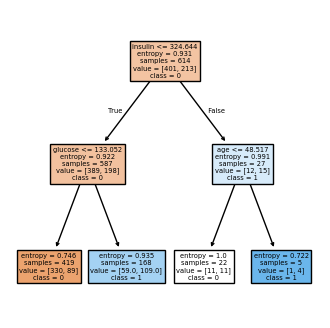

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
tree.plot_tree(parameterstree,
               feature_names = col_names,
               class_names=['0','1'],
               filled = True);

# Model with Gini Index

This code initializes a **DecisionTreeClassifier** with several hyperparameters to control the behavior of the decision tree. Specifically, it uses the **Gini Index** as the criterion for splitting nodes.

### Explanation of Each Parameter:

1. **criterion="gini"**:
   - The `criterion` parameter defines how the quality of a split is measured at each node. **"gini"** refers to the **Gini impurity** measure, which calculates the probability of a randomly selected element being misclassified. A Gini index of 0 indicates perfect purity (all instances belong to the same class).

2. **splitter="random"**:
   - The `splitter` parameter determines how the tree splits the data at each node. By setting it to **"random"**, a random subset of features will be considered at each node, making the tree more diverse and helping to reduce overfitting.

3. **max_depth=2**:
   - The `max_depth` parameter limits the maximum depth of the tree. Setting it to **2** means the tree will have at most two levels, which helps prevent overfitting by simplifying the model and restricting its complexity.

4. **min_samples_split=5**:
   - The `min_samples_split` parameter specifies the minimum number of samples required to split an internal node. If a node has fewer than 5 samples, it will not be split further. This helps prevent the tree from creating overly specific splits based on small amounts of data.

5. **min_samples_leaf=5**:
   - The `min_samples_leaf` parameter specifies the minimum number of samples required to be at a leaf node. A leaf node must contain at least 5 samples, which helps control overfitting by ensuring that leaf nodes are not based on very few data points.

6. **max_features=5**:
   - The `max_features` parameter controls the number of features to consider when looking for the best split at each node. By setting it to **5**, the model will randomly select up to 5 features at each split, which increases randomness and diversity among the trees, helping to reduce overfitting.

7. **random_state=206**:
   - The `random_state` parameter ensures the random processes (such as random feature selection and data sampling) are reproducible. By setting a fixed random seed (206 in this case), the results of the decision tree creation will be consistent across runs.



In [ ]:
parameterstree = DecisionTreeClassifier(criterion = "gini",
                                        splitter = "random",
                                        max_depth = 2,
                                        min_samples_split = 5,
                                        min_samples_leaf = 5,
                                        max_features = 5,
                                       random_state=206)

# Training, Predicting, and Evaluating the Decision Tree Model

### 1. **Training the Model**



In [ ]:
parameterstree.fit(X_train,y_train)
y_pred_param = parameterstree.predict(X_test)
parameterstree.score(X_train,y_train)

0.739413680781759

# Evaluating the Model's Performance on the Test Set

1. **parameterstree**:
   - This is the **DecisionTreeClassifier** (or any other trained model) that was previously trained using the `fit()` method on the training data (`X_train` and `y_train`).

2. **score(X_test, y_test)**:
   - The `score()` method calculates the **accuracy** of the model by comparing the predicted labels for the test data (`X_test`) with the true labels (`y_test`).
   - Accuracy is calculated as the proportion of correct predictions (the number of times the model's prediction matches the true label) out of all predictions made on the test set.

3. **X_test**:
   - `X_test` represents the **feature data** for the test set, which contains input variables that the model has not seen before during training.

4. **y_test**:
   - `y_test` represents the **true target labels** for the test set, which are the actual values that correspond to the test data instances in `X_test`.




In [ ]:
parameterstree.score(X_test,y_test)

0.7207792207792207

# Accuracy Calculation

1. **metrics.accuracy_score(y_test, y_pred_param)**:
   - The `accuracy_score()` function from the `metrics` module calculates the **accuracy** of the model by comparing the true labels (`y_test`) with the predicted labels (`y_pred_param`).
   - Accuracy is defined as the ratio of correctly predicted labels to the total number of predictions. It helps in evaluating the performance of the model.

2. **y_test**:
   - `y_test` contains the **true target labels** for the test set. These are the actual class labels for the instances in `X_test`.

3. **y_pred_param**:
   - `y_pred_param` contains the **predicted labels** generated by the trained model for the test set. These predictions are based on the decision tree’s learned patterns from the training data.

4. **print()**:
   - The `print()` function is used to display the accuracy score on the screen.




In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.7207792207792207


# Classification Report

1. **metrics.classification_report(y_pred_param, y_test)**:
   - The `classification_report()` function from the `metrics` module generates a detailed report of the model's performance by comparing the predicted labels (`y_pred_param`) with the true labels (`y_test`).
   - The report includes several important classification metrics:
     - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "How many of the predicted positive instances are actually positive?"
     - **Recall**: The ratio of correctly predicted positive observations to all actual positives. It answers: "How many actual positive instances were correctly predicted?"
     - **F1-Score**: The weighted average of precision and recall, balancing both. It is particularly useful when the class distribution is imbalanced.
     - **Support**: The number of actual occurrences of each class in the dataset.

2. **y_pred_param**:
   - This contains the **predicted labels** for the test data (`X_test`). These are the model's predictions after it has been trained on the training data.

3. **y_test**:
   - This contains the **true target labels** for the test data. These are the actual class labels, which are used as the ground truth to evaluate the model’s predictions.

4. **print()**:
   - The `print()` function outputs the classification report to the console, showing the performance metrics for each class in the dataset.



In [ ]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       112
           1       0.49      0.64      0.56        42

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.75      0.72      0.73       154



# Visualizing the Decision Tree

This code visualizes the trained decision tree model (`parameterstree`) using **matplotlib** and **sklearn.tree.plot_tree**.

1. **import matplotlib.pyplot as plt**:
   - This imports the `matplotlib.pyplot` library, which is used to create visualizations, including the plot of the decision tree.

2. **fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=150)**:
   - `plt.subplots()` creates a figure and axes object for plotting.
     - **nrows=1, ncols=1**: Specifies that we want one plot (one row and one column).
     - **figsize=(4, 4)**: Specifies the size of the figure (4x4 inches).
     - **dpi=150**: Specifies the resolution of the plot (dots per inch), making the plot clearer.

3. **tree.plot_tree(parameterstree, ...)**:
   - This function visualizes the decision tree (`parameterstree`) as a flowchart.
     - **parameterstree**: The trained decision tree model.
     - **feature_names=col_names**: Uses the list `col_names` to label the features at each node of the tree.
     - **class_names=['0', '1']**: Labels the two classes (e.g., `0` and `1` for binary classification) at each leaf of the tree.
     - **filled=True**: Colors the nodes based on their class and impurity level. This makes the tree visually more informative and helps to easily interpret how the tree is making decisions.



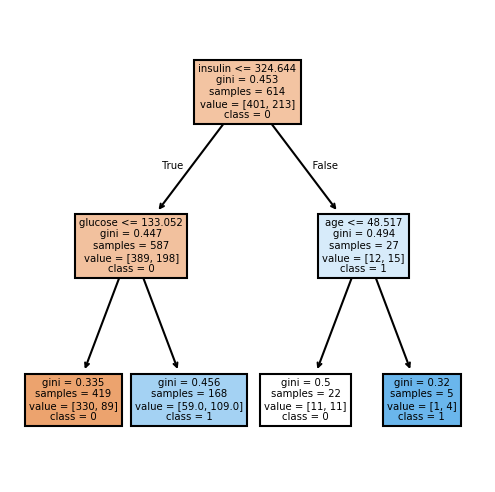

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(parameterstree,
               feature_names = col_names,
               class_names=['0','1'],
               filled = True);

# Ensemble Learning

**Ensemble Learning** is a machine learning technique where multiple models (called base learners or weak learners) are combined to solve a problem and improve performance. The main idea is that combining several models can reduce errors and increase accuracy by leveraging the strengths of different models.

### Types of Ensemble Learning:

1. **Bagging (Bootstrap Aggregating)**:
   - Bagging trains multiple models independently using random subsets of the training data, usually with replacement (called **bootstrapping**).
   - Each model's prediction is averaged (in regression) or voted on (in classification) to make the final prediction.
   - **Random Forest** is a popular example of bagging where many decision trees are trained and their results are aggregated.
   
   **Advantages**:
   - Reduces variance by averaging over multiple models, helping to prevent overfitting.
   
2. **Boosting**:
   - Boosting trains models sequentially, with each new model correcting the errors of the previous one.
   - The goal is to focus more on the misclassified instances by assigning them higher weights in the next round of training.
   - **Gradient Boosting** and **AdaBoost** are popular boosting algorithms.
   
   **Advantages**:
   - Improves the accuracy of weak learners by combining them iteratively.

3. **Stacking**:
   - Stacking involves training multiple models (called base learners) and using another model (meta-learner) to combine their predictions.
   - The meta-learner is trained to make the best decision based on the outputs of the base models.
   
   **Advantages**:
   - Can combine models with different strengths and weaknesses to improve overall performance.

### Benefits of Ensemble Learning:
- **Improved Accuracy**: Combining multiple models often results in better performance than individual models.
- **Reduced Overfitting**: By averaging out predictions or focusing on different aspects of the data, ensemble methods can generalize better.
- **Robustness**: The ensemble method is more stable and robust to noise and outliers compared to a single model.

# Random Forest

**Random Forest** is an ensemble learning method that combines multiple decision trees to improve performance. It is a type of **Bagging** technique, where the model builds many decision trees and combines their predictions to make a final decision. This method reduces overfitting and increases generalization compared to a single decision tree.

### Key Characteristics of Random Forest:

1. **Bootstrapping**:
   - Each tree in the random forest is trained on a random subset of the data, sampled **with replacement** (called **bootstrapping**). This means some data points may be used multiple times, while others may not be used at all for each tree.
   
2. **Random Feature Selection**:
   - At each split in the decision tree, a random subset of features is selected. Instead of evaluating all the features, the tree only considers a small random set, which helps reduce overfitting and increases diversity among the trees.

3. **Ensemble Voting**:
   - For **classification tasks**, the final prediction is made based on the majority vote from all the trees in the forest. For **regression tasks**, the final output is the average of all tree predictions.

### Benefits of Random Forest:

- **Reduces Overfitting**: Since it combines multiple trees and uses random sampling, it reduces the risk of overfitting that can occur with a single decision tree.
- **Handles Large Datasets**: Random Forest can handle large datasets with higher dimensionality and works well with both categorical and numerical features.
- **Robust to Outliers**: The ensemble method helps smooth out the impact of outliers and noisy data.



1. **from sklearn.ensemble import RandomForestClassifier**:
   - This imports the **RandomForestClassifier** class from `sklearn.ensemble`. This is the model that will be used to build the Random Forest.

2. **classifier = RandomForestClassifier(n_estimators=100, random_state=0)**:
   - **n_estimators=100**: This parameter specifies the number of decision trees in the forest. Here, we are using **100 trees**. More trees typically lead to better performance but also increase computation time.
   - **random_state=0**: This ensures reproducibility of the random processes, such as the selection of data subsets and features. It guarantees the same results each time the code is run.




In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Making Predictions with the Trained Model

1. **clf**:
   - This is the **classifier model** (e.g., `RandomForestClassifier`, `LogisticRegression`, etc.) that was previously trained using the `fit()` method on the training data (`X_train` and `y_train`).

2. **predict(X_test)**:
   - The `predict()` method generates predictions based on the input data (`X_test`), which contains the feature data of the test set.
   - The trained model applies the learned patterns from the training data to the test data (`X_test`) and predicts the target labels for each instance in `X_test`.

3. **ypred**:
   - `ypred` stores the **predicted labels** for the test set (`X_test`). These predictions are the model's best guesses for the target variable based on the features in `X_test`.




In [ ]:
ypred = clf.predict(X_test)

# Calculating and Printing the Accuracy

1. **from sklearn.metrics import accuracy_score**:
   - This imports the **accuracy_score** function from the `sklearn.metrics` module. The `accuracy_score` function is used to evaluate the performance of classification models by calculating the accuracy.

2. **accuracy_score(y_test, ypred)**:
   - The `accuracy_score` function compares the true labels (`y_test`) with the predicted labels (`ypred`) to calculate the accuracy of the model.
   - **Accuracy** is the ratio of the number of correct predictions to the total number of predictions. It is calculated as:
     \[
     \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
     \]

3. **print(accuracy_score(y_test, ypred))**:
   - The `print()` function is used to output the calculated accuracy score to the console, allowing you to see how well the model performed on the test set.




In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.8051948051948052


# Randomized Search CV

**Randomized Search Cross-Validation** (RandomizedSearchCV) is a technique for hyperparameter tuning in machine learning models. It is an alternative to **GridSearchCV**, but instead of searching over all possible combinations of hyperparameters, it samples a fixed number of random combinations. This approach is more efficient when the hyperparameter space is large, as it reduces the number of combinations evaluated while still exploring a broad range of possibilities.

### Key Concepts of RandomizedSearchCV:

1. **Hyperparameter Tuning**:
   - Machine learning models often have hyperparameters that need to be set before training. These hyperparameters control the learning process and can significantly affect the model's performance.
   - Examples of hyperparameters include the number of trees in a Random Forest (`n_estimators`), the maximum depth of decision trees (`max_depth`), and the learning rate (`learning_rate`).

2. **Random Search**:
   - Instead of exhaustively searching over all possible hyperparameter combinations, **RandomizedSearchCV** selects random combinations from a defined search space. This makes it faster than GridSearchCV, which checks all combinations.

3. **Cross-Validation**:
   - RandomizedSearchCV evaluates each combination of hyperparameters using **cross-validation**. This means that the dataset is split into multiple subsets (folds), and the model is trained and validated on different folds to ensure the performance is generalizable.

4. **Efficiency**:
   - Randomized Search is particularly useful when the hyperparameter space is large and computationally expensive to search exhaustively. It can find good hyperparameters with fewer evaluations than GridSearchCV, especially when you limit the number of iterations (`n_iter`).




# Random Forest Hyperparameter Space (`rf_params`)

This dictionary contains the hyperparameters and their possible values for a **Random Forest Classifier**. These hyperparameters will be used for tuning the model, typically with **RandomizedSearchCV** or **GridSearchCV**.

### Explanation of Each Parameter:

1. **'max_depth'**:
   - Specifies the maximum depth of each tree in the forest. Limiting the depth can help prevent overfitting by controlling how complex each tree can become.
   - Possible values: **[3, 5, 10]**. These values represent different depths for the decision trees in the random forest.

2. **'max_features'**:
   - Controls the number of features to consider when looking for the best split at each node.
   - Possible values: **(1, 2, 3, 4, 5, 6, 'sqrt', 'log2')**. These represent the number of features to consider for each split:
     - **'sqrt'**: Square root of the total number of features (default for classification).
     - **'log2'**: Logarithm base 2 of the total number of features.

3. **'criterion'**:
   - Defines the function used to measure the quality of a split in the decision trees.
   - Possible values: **['gini', 'entropy']**:
     - **'gini'**: Gini impurity (default), used to measure the "impurity" of a node.
     - **'entropy'**: Information gain based on entropy, another method to measure impurity.

4. **'bootstrap'**:
   - Determines whether bootstrap sampling (sampling with replacement) is used when building the trees.
   - Possible values: **[True, False]**:
     - **True**: Uses bootstrap sampling, meaning that each tree is trained on a random subset of the data, with replacement.
     - **False**: No bootstrap sampling, meaning that each tree is trained on the entire dataset.

5. **'min_samples_leaf'**:
   - Specifies the minimum number of samples required to be in a leaf node. This helps control overfitting by preventing the model from learning overly specific rules.
   - Possible values: **(1, 2, 3, 5, 7, 8, 9, 10)**. These values define the minimum number of samples that must be in each leaf node.




In [ ]:
rf_params={'max_depth':[3,5,10],
              'max_features':(1,2,3,4,5,6,'sqrt','log2'),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':(1,2,3,5,7,8,9,10)
              }

# Randomized Search CV for Hyperparameter Tuning

This code performs **Randomized Search Cross-Validation** (**RandomizedSearchCV**) to search for the best hyperparameters for a model (`classifier`), using the hyperparameter space defined in `rf_params`. Here’s an explanation of each parameter used:

### 1. **from sklearn.model_selection import RandomizedSearchCV**:
   - This imports the `RandomizedSearchCV` class from the `sklearn.model_selection` module. It is used to perform a random search over hyperparameter combinations with cross-validation to find the best hyperparameters for the model.

### 2. **gd_sr = RandomizedSearchCV(...)**:
   - **classifier**: The model (e.g., `RandomForestClassifier`) that we want to tune. It could be any classifier that has already been initialized earlier.
   - **rf_params**: The dictionary containing the hyperparameter search space (`max_depth`, `max_features`, `criterion`, etc.), which defines the range of values to search over.
   - **cv=5**: This defines the number of folds in **cross-validation**. In this case, 5-fold cross-validation is used, meaning the data will be split into 5 subsets (folds), and the model will be trained and evaluated 5 times, each time using a different fold for evaluation.
   - **scoring="recall"**: This defines the evaluation metric used to assess the model’s performance. Here, **recall** is used, which focuses on how well the model identifies positive instances.
     - Recall is calculated as:
       \[
       \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
       \]
     - It is particularly useful when false negatives are costly or undesirable (e.g., in medical diagnoses).
   - **random_state=0**: This ensures that the random sampling in RandomizedSearchCV is reproducible. By setting a fixed seed (`random_state=0`), you ensure that the random choices (like which hyperparameters to sample) are the same each time the code is run.
   - **refit=False**: This indicates that the best hyperparameters found by the search should **not** be used to refit the model on the entire dataset after the search is completed. If set to `True`, it would retrain the model on the entire dataset using the best hyperparameters.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gd_sr = RandomizedSearchCV(classifier, rf_params, cv = 5, scoring = "recall", random_state = 0, refit = False)

# Fitting the Randomized Search CV to the Training Data

1. **gd_sr**:
   - This is the **RandomizedSearchCV** object created earlier, where a random search over the hyperparameter space (`rf_params`) will be performed. It uses cross-validation to evaluate different combinations of hyperparameters for the model (`classifier`).

2. **fit(X_train, y_train)**:
   - The `fit()` method is used to **train the model** by performing the random search for the best hyperparameters.
   - During this process:
     - The model will be trained on the **training data** (`X_train`) and its corresponding target labels (`y_train`).
     - It will evaluate the performance of different hyperparameter combinations using **5-fold cross-validation** (as defined by `cv=5`).
     - The model's performance is evaluated based on the **recall** score (as defined by `scoring="recall"`).

3. **search**:
   - The `fit()` method returns the **RandomizedSearchCV** object (`search`) after performing the search. It now contains information about:
     - The best hyperparameters found (`search.best_params_`).
     - The best score achieved (`search.best_score_`).



In [ ]:
search = gd_sr.fit(X_train, y_train)

# Retrieving the Best Hyperparameters from Randomized Search CV

1. **search.best_params_**:
   - This is an attribute of the **RandomizedSearchCV** object (`search`) that contains the **best hyperparameters** found during the random search process.
   - After performing the search with cross-validation, **RandomizedSearchCV** identifies the combination of hyperparameters from `rf_params` that gave the best performance, as evaluated by the specified scoring metric (in this case, **recall**).

2. **What it returns**:
   - The `best_params_` attribute returns a dictionary where the keys are the hyperparameter names (e.g., `'max_depth'`, `'min_samples_leaf'`, etc.) and the values are the best values for those hyperparameters.



In [ ]:
search.best_params_

{'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': False}

# Retrieving and Printing the Best Score from Randomized Search CV

1. **search.best_score_**:
   - This attribute of the **RandomizedSearchCV** object (`search`) holds the **best score** achieved during the search process. It represents the highest performance score based on the evaluation metric (in this case, **recall**) from the cross-validation performed for each hyperparameter combination.

2. **best_result = search.best_score_**:
   - The `best_score_` is assigned to the variable `best_result`, which stores the highest score achieved across all hyperparameter combinations evaluated during the search.

3. **print(best_result)**:
   - The `print()` function outputs the value of `best_result`, which is the best score achieved by the model using the best combination of hyperparameters found by the **RandomizedSearchCV**.




In [ ]:
best_result = search.best_score_
print(best_result)

0.5867109634551495


# Using the Best Hyperparameters for Random Forest

In this code, we initialize a **Random Forest Classifier** with the best hyperparameters found during the **RandomizedSearchCV** process. These hyperparameters are used to build a Random Forest model and then train it on the **training data** (`X_train` and `y_train`).

### Explanation of Parameters:

1. **min_samples_leaf=2**:
   - This parameter sets the minimum number of samples required to be at a leaf node. Setting it to **2** ensures that each leaf node contains at least two samples, which helps in controlling overfitting by preventing the creation of overly specific nodes.

2. **max_features='sqrt'**:
   - This specifies the number of features to consider when looking for the best split at each node. Using **'sqrt'** means that the number of features considered will be the square root of the total number of features. This is commonly used for classification tasks and helps in reducing overfitting by limiting the number of features available at each node.

3. **max_depth=5**:
   - The `max_depth` parameter controls the maximum depth of each tree in the forest. Setting it to **5** limits the depth of the trees, which prevents them from becoming too complex and overfitting the training data.

4. **criterion='gini'**:
   - The `criterion` parameter defines the function to measure the quality of a split. Using **'gini'** refers to the **Gini impurity**, which is used to measure the "impurity" of a node. A Gini value of 0 means the node is pure, i.e., all samples in the node belong to the same class.

5. **bootstrap=True**:
   - The `bootstrap` parameter specifies whether to use bootstrap sampling (sampling with replacement) to build each tree. Setting it to **True** means that each tree is trained on a random subset of the data, sampled with replacement.

### Training the Model:

- **clf.fit(X_train, y_train)**:
   - The `fit()` method is used to train the **Random Forest** model (`clf`) using the training data (`X_train`) and the corresponding target labels (`y_train`). The model learns patterns from this data based on the specified hyperparameters.



In [ ]:
# Use best parameters

clf = RandomForestClassifier(min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 5,
 criterion='gini',
 bootstrap= True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2)

# Making Predictions with the Trained Random Forest Model

1. **clf**:
   - This is the **RandomForestClassifier** model that has been trained on the **training data** (`X_train` and `y_train`) using the hyperparameters defined earlier.

2. **predict(X_test)**:
   - The `predict()` method is used to generate **predictions** based on the **test data** (`X_test`), which contains the feature data that the model has not seen before during training.
   - The trained model (`clf`) applies the learned patterns from the training data to predict the target labels for each instance in `X_test`.

3. **ypred**:
   - `ypred` stores the **predicted labels** for the test data (`X_test`). These predictions represent the model’s output after it has been applied to the test set.
   - These predicted labels can later be compared to the true labels (`y_test`) to evaluate the model's performance.


In [ ]:
ypred = clf.predict(X_test)

# Calculating and Printing the Accuracy

1. **accuracy_score(y_test, ypred)**:
   - The `accuracy_score()` function from the `sklearn.metrics` module is used to calculate the **accuracy** of the model's predictions.
   - It compares the true labels (`y_test`) with the predicted labels (`ypred`) and computes the proportion of correct predictions to the total number of predictions.
   - **Accuracy** is defined as:
     \[
     \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
     \]
   - A higher accuracy score indicates better performance of the model.

2. **print(accuracy_score(y_test, ypred))**:
   - The `print()` function outputs the accuracy score to the console, allowing you to see how well the model performed on the test set by showing the proportion of correct predictions.



In [ ]:
print(accuracy_score(y_test,ypred))

0.8116883116883117


# Counting the Occurrences of Each Class in the Training Set

1. **y_train**:
   - `y_train` represents the **true target labels** for the training data. It is a series or array containing the class labels for each instance in the training set.

2. **value_counts()**:
   - The `value_counts()` method is used to count the number of occurrences of each unique value (class label) in the **target labels** (`y_train`).
   - This method returns a **Series** with the class labels as the index and the corresponding counts as the values.

3. **Output**:
   - The output will show how many instances belong to each class in the training set, which helps in understanding the class distribution.





In [ ]:
y_train.value_counts()

label
0    401
1    213
Name: count, dtype: int64

# Gradient Boosting Model and Log-Loss Evaluation

1. **from sklearn.ensemble import GradientBoostingClassifier**:
   - This imports the **GradientBoostingClassifier** from `sklearn.ensemble`. Gradient Boosting is a powerful ensemble technique that builds a model by training multiple weak models sequentially. Each new model corrects the errors of the previous one.

2. **from sklearn.metrics import log_loss**:
   - This imports the `log_loss` function from `sklearn.metrics`. Log-loss, also known as **logarithmic loss** or **cross-entropy loss**, measures the performance of classification models, particularly in probabilistic classification problems. A lower log-loss value indicates better model performance.

3. **sklearn_gbm = GradientBoostingClassifier(...)**:
   - This initializes the **GradientBoostingClassifier** with the following hyperparameters:
     - **n_estimators=20**: The number of boosting stages (i.e., the number of trees in the ensemble). Here, **20** trees are used.
     - **learning_rate=0.1**: The learning rate shrinks the contribution of each tree to the final prediction. A smaller learning rate typically improves model performance, but requires more trees.
     - **max_depth=1**: The maximum depth of each individual tree. Setting it to **1** makes the trees shallow, which is typical for Gradient Boosting when trying to avoid overfitting.

4. **sklearn_gbm.fit(X_train, y_train)**:
   - The `fit()` method is used to train the **GradientBoostingClassifier** (`sklearn_gbm`) on the training data (`X_train`) and the target labels (`y_train`). The model learns from the data and builds a series of decision trees to improve prediction accuracy.

5. **sklearn_gbm_log_loss = log_loss(y_test, sklearn_gbm.predict_proba(X_test))**:
   - **`predict_proba(X_test)`**: This method generates the predicted probabilities for each class on the test data (`X_test`).
   - **log_loss(y_test, ...)**: The `log_loss` function calculates the log-loss between the true labels (`y_test`) and the predicted probabilities. This measures how well the model's predicted probabilities match the true classes.
     - A lower log-loss indicates better performance, as it means the model’s predicted probabilities are closer to the true values.

6. **print(f"Scikit-learn GBM Log-Loss: {sklearn_gbm_log_loss:.15f}")**:
   - The `print()` function displays the log-loss value to the console. The result is formatted to display 15 decimal places for precision.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

sklearn_gbm = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=1
)
sklearn_gbm.fit(X_train, y_train)
sklearn_gbm_log_loss = log_loss(y_test, sklearn_gbm.predict_proba(X_test))
print(f"Scikit-learn GBM Log-Loss:{sklearn_gbm_log_loss:.15f}")

Scikit-learn GBM Log-Loss:0.513407741063049


# Making Predictions and Evaluating Accuracy

1. **pred_4 = sklearn_gbm.predict(X_test)**:
   - The `predict()` method is used to generate **predictions** on the test data (`X_test`) using the trained **Gradient Boosting Model** (`sklearn_gbm`).
   - These predictions are stored in `pred_4`. The model outputs the predicted class labels for each instance in the test set.

2. **print('Accuracy Score', accuracy_score(pred_4, y_test))**:
   - **accuracy_score(pred_4, y_test)**: The `accuracy_score()` function from `sklearn.metrics` computes the **accuracy** of the model by comparing the predicted labels (`pred_4`) with the true labels (`y_test`).
     - **Accuracy** is calculated as the ratio of the number of correct predictions to the total number of predictions. It is a measure of how well the model classifies the test data.
   - The `print()` function is used to display the accuracy score on the console.


In [ ]:
pred_4 = sklearn_gbm.predict(X_test)

print('Accuracy Score',accuracy_score(pred_4,y_test))

Accuracy Score 0.7597402597402597


In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Using XGBoost for Classification

1. **import xgboost as xgb**:
   - This imports the **XGBoost** library as `xgb`. XGBoost is a highly efficient implementation of **Gradient Boosting** that is often used for classification and regression tasks. It is known for its speed, performance, and ability to handle large datasets.

2. **xg_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)**:
   - This initializes the **XGBClassifier** model, which is the classifier version of **XGBoost**.
   - **random_state=1**: Ensures reproducibility of the results. By setting a fixed random seed, the model's random processes (such as data sampling) will be consistent across runs.
   - **learning_rate=0.01**: Sets the learning rate (also called the shrinkage parameter), which determines the step size for updating the model's weights. A smaller learning rate (e.g., 0.01) often leads to better generalization, but requires more trees to achieve the same performance.

3. **xg_model.fit(X_train, y_train)**:
   - The `fit()` method is used to **train the XGBoost model** (`xg_model`) on the training data (`X_train`) and the corresponding target labels (`y_train`).
   - The model learns from the training data and adjusts its internal parameters based on the gradient boosting process.




In [ ]:
import xgboost as xgb
xg_model = xgb.XGBClassifier(random_state=1,
                             learning_rate=0.01)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Initializing an XGBoost Classifier with Custom Hyperparameters

This code initializes an **XGBoost classifier** (`new_xbg_model`) with a variety of hyperparameters to control the behavior of the model. Each of these parameters influences how the model is trained and how it performs on the given task.

### Explanation of Parameters:

1. **base_score=0.2**:
   - The initial prediction score for all instances. This score is used to initialize the model before the boosting process starts.

2. **booster='gbtree'**:
   - Specifies the type of boosting model to use. `gbtree` indicates that the model will use **gradient boosting trees**, which is the most common and widely used method.

3. **colsample_bylevel=0.5**:
   - The fraction of features to sample at each level of the tree. A value of 0.5 means 50% of the features are used at each tree level, helping to reduce overfitting.

4. **colsample_bytree=0.5**:
   - The fraction of features to sample when building each tree. A value of 0.5 means 50% of the features are used for each tree, helping to prevent overfitting.

5. **gamma=0**:
   - The minimum loss reduction required to make a further partition on a leaf node. A value of 0 means no restriction, and more splits can happen.

6. **importance_type='gain'**:
   - Specifies the method used to compute feature importance. `gain` measures the contribution of each feature to the improvement in the model's prediction.

7. **learning_rate=0.05**:
   - The step size at each iteration while moving toward a minimum. A smaller learning rate (0.05) typically means the model requires more trees (`n_estimators`) to converge to the optimal solution, but it can help in better generalization.

8. **max_depth=3**:
   - The maximum depth of each tree. A smaller value (3) prevents the trees from becoming too complex and helps to reduce overfitting.

9. **min_child_weight=1**:
   - The minimum sum of instance weight (or Hessian) needed in a child node. A higher value can be used to make the model more conservative and avoid overfitting.

10. **monotone_constraints='(1,0)'**:
   - Defines constraints on the features to enforce a monotonic relationship between the features and the output. `(1,0)` means that the first feature has a positive impact, and the second feature has no effect.

11. **n_estimators=1000**:
   - The number of boosting rounds (trees) to train the model. More trees typically improve accuracy, but it may increase training time and the risk of overfitting.

12. **objective='binary:logistic'**:
   - Specifies the objective function to optimize. `binary:logistic` indicates that the task is binary classification, where the output is predicted as a probability.

13. **random_state=211**:
   - The random seed used to initialize the random number generator, ensuring reproducibility.

14. **reg_alpha=0**:
   - L1 regularization term on weights. It helps prevent overfitting by penalizing large coefficients.

15. **reg_lambda=1**:
   - L2 regularization term on weights. Similar to `reg_alpha`, it penalizes large coefficients to prevent overfitting.

16. **scale_pos_weight=1**:
   - Controls the balance of positive and negative weights in imbalanced classes. A value of 1 means no weighting.

17. **subsample=1**:
   - The fraction of samples to use for each boosting round. A value of 1 means all the samples are used, which can lead to overfitting if the model is too complex.

18. **tree_method='exact'**:
   - Specifies the method used for tree construction. `exact` means the exact algorithm is used to split the nodes, which is more accurate but computationally expensive. Other options include `hist` and `approx` for faster tree construction.

19. **validate_parameters=1**:
   - Whether to validate the parameters used for the model. A value of `1` means parameters will be validated.

20. **verbosity=0**:
   - Controls the level of logging output. Setting it to `0` suppresses most of the output, making the training process less verbose.




In [ ]:
new_xbg_model = xgb.XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=0.5,
                              colsample_bytree=0.5, gamma=0,
                              importance_type='gain', interaction_constraints='',
                              learning_rate=0.05, max_delta_step=0, max_depth=3,
                              min_child_weight=1, monotone_constraints='(1,0)',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              objective='binary:logistic', random_state=211, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1, verbosity=0)

# Training the XGBoost Model

1. **new_xbg_model**:
   - This is the **XGBoost classifier** (`XGBClassifier`) that was initialized earlier with custom hyperparameters. It has been set up with various parameters, such as learning rate, maximum depth, and number of estimators, to control the model's learning process.

2. **fit(X_train, y_train)**:
   - The `fit()` method is used to **train** the **XGBoost model** (`new_xbg_model`) on the **training data** (`X_train`) and the corresponding **target labels** (`y_train`).
   - During this process, the model learns the patterns and relationships between the features in `X_train` and the target labels in `y_train`. The **boosting** process will create multiple trees, each one attempting to correct the errors of the previous tree.




In [ ]:
new_xbg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='(1,0)', multi_strategy=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, ...)

# Making Predictions and Evaluating Accuracy for XGBoost Model

1. **pred_6 = xg_model.predict(X_test)**:
   - The `predict()` method is used to generate **predictions** for the test data (`X_test`) using the trained **XGBoost model** (`xg_model`).
   - The model applies the patterns it learned from the training data to the test data and outputs the predicted class labels for each instance in `X_test`.
   - The predicted labels are stored in the variable `pred_6`.

2. **print(accuracy_score(pred_6, y_test))**:
   - **accuracy_score(pred_6, y_test)**: The `accuracy_score()` function from the `sklearn.metrics` module is used to calculate the **accuracy** of the model's predictions.
     - Accuracy is calculated as the ratio of the number of correct predictions to the total number of predictions. It gives an indication of how well the model performs on the test set.
   - The `print()` function outputs the accuracy score to the console.




In [ ]:
pred_6 = xg_model.predict(X_test)
print(accuracy_score(pred_6,y_test))

0.7987012987012987


# Importing Logistic Regression

1. **from sklearn.linear_model import LogisticRegression**:
   - This imports the **LogisticRegression** class from the `sklearn.linear_model` module.
   - **Logistic Regression** is a statistical model used for binary classification tasks. It models the probability that a given input point belongs to a particular class, typically using a **sigmoid function** to output probabilities between 0 and 1.
   
### Key Points About Logistic Regression:
- **Binary Classification**: Logistic Regression is primarily used for problems where the target variable has two classes (e.g., `0` or `1`).
- **Linear Model**: Although it's called "Logistic Regression," it is actually a **linear model**. The model calculates a weighted sum of the input features and applies a logistic (sigmoid) function to the result to make predictions.
- **Interpretability**: The model is easy to interpret because it estimates the odds ratios for the presence of each feature in the target class.




In [ ]:
from sklearn.linear_model import LogisticRegression

# Initializing a Logistic Regression Model

1. **LR = LogisticRegression()**:
   - This initializes a **Logistic Regression model** (`LR`) using the default settings from the `LogisticRegression` class.
   - **Logistic Regression** is commonly used for binary classification tasks, where the model predicts the probability that an instance belongs to a particular class (e.g., class `0` or class `1`).
   
### Default Parameters:
- **Solver**: The model uses a default solver (typically **liblinear**) to fit the model to the data. The solver helps in finding the optimal weights for the model.
- **Penalty**: By default, **L2 regularization** is applied to avoid overfitting and penalize large coefficients.



In [ ]:
LR=LogisticRegression()

# Training the Logistic Regression Model

1. **LR**:
   - This is the **Logistic Regression model** (`LR`) that was initialized earlier using the `LogisticRegression()` class.

2. **fit(X_train, y_train)**:
   - The `fit()` method is used to **train** the Logistic Regression model (`LR`) on the **training data** (`X_train`) and the corresponding **target labels** (`y_train`).
   - The model learns from the data by adjusting its internal parameters (the weights associated with each feature) to minimize the difference between its predicted values and the true labels in `y_train`.
   - The goal of training is to find the best model parameters (weights) that allow the model to generalize well to new, unseen data.



In [ ]:
LR.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making Predictions with the Logistic Regression Model

1. **LR**:
   - This is the **Logistic Regression model** (`LR`) that has been trained using the `fit()` method on the training data (`X_train`) and corresponding target labels (`y_train`).

2. **predict(X_test)**:
   - The `predict()` method is used to generate **predictions** on the **test data** (`X_test`) using the trained model (`LR`).
   - The model applies the learned relationships between the features and target labels from the training data to the test data and predicts the class labels (e.g., `0` or `1`) for each instance in `X_test`.

3. **pred_7**:
   - The predicted labels are stored in the variable `pred_7`. These are the model’s predictions for the test set (`X_test`), and they can be compared with the true labels (`y_test`) to evaluate model performance.



In [ ]:
pred_7=LR.predict(X_test)

# Calculating and Printing the Accuracy

1. **accuracy_score(pred_7, y_test)**:
   - The `accuracy_score()` function from `sklearn.metrics` is used to calculate the **accuracy** of the model’s predictions by comparing the predicted labels (`pred_7`) with the true labels (`y_test`).
   - **Accuracy** is defined as the proportion of correct predictions to the total number of predictions. It is calculated as:
     \[
     \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
     \]
   - The function will return a value between 0 and 1, where a higher value indicates better performance of the model.

2. **print(accuracy_score(pred_7, y_test))**:
   - The `print()` function outputs the accuracy score to the console, allowing you to see how well the **Logistic Regression model** (`LR`) performed on the test data.



In [ ]:
print(accuracy_score(pred_7,y_test))

0.7792207792207793
